<a href="https://colab.research.google.com/github/joaopasini/letscode_repository/blob/main/Projetos/Redes%20Neurais/Projeto_Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercício prático

Utilize o dataset de predição de câncer de pele para prever se a pinta/mancha é benigna ou maligna

https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign 

- Utilize a rede VGG16 como modelo pré-treinado e adicione algumas camadas no topo.
- Utilize o ImageDataGenerator com o preprocess_input do VGG16.

In [2]:
# Utilizando API do Kaggle para usar no Colab
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'

In [4]:
# Baixando o dataset do Kaggle para o Colab
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

 98% 319M/325M [00:03<00:00, 105MB/s] 
100% 325M/325M [00:03<00:00, 105MB/s]


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# # Mudando a chave API para privada
! chmod 600 /content/kaggle.json

In [ ]:
# fazendo o unzip do arquivo
! unzip skin-cancer-malignant-vs-benign.zip

In [ ]:
# excluindo dataset duplicado (diretorio data)
# ! rm -r data

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

model = VGG16()

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Predição usando um modelo pré-treinado
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import matplotlib.pyplot as plt

In [ ]:
# load da imagem
image = load_img('1.jpg', target_size=(224, 224))
print(type(image))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [ ]:
image = img_to_array(image)
print(type(image))

<class 'numpy.ndarray'>


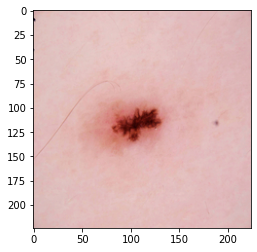

In [ ]:
plt.imshow(image.astype(int))
plt.show()

In [ ]:
image.shape

(224, 224, 3)

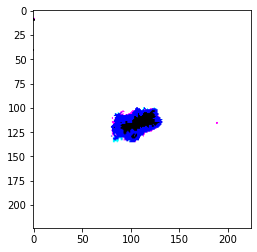

In [ ]:
image_ = preprocess_input(image)
plt.imshow(image_)
plt.show()

In [ ]:
# shape=(None, 224, 224, 3)
image_ = image_.reshape((1, image_.shape[0], image_.shape[1], image_.shape[2]))
print(image_.shape)

(1, 224, 224, 3)


In [ ]:
y_pred = model.predict(image_)

In [ ]:
y_pred.shape

(1, 1000)

In [ ]:
label= decode_predictions(y_pred)
label 

49152/35363 [=========================================] - 0s 1us/step


[[('n01776313', 'tick', 0.9114283),
  ('n02219486', 'ant', 0.018103803),
  ('n01775062', 'wolf_spider', 0.016874084),
  ('n02233338', 'cockroach', 0.009069394),
  ('n01773549', 'barn_spider', 0.0056872396)]]

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16
from tensorflow.keras.models import Model
from pickle import dump

image = load_img('1.jpg', target_size=(224, 224))
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)

In [ ]:
model_ = VGG16()

In [ ]:
# acessando as layers utilizando o método layers
model_.layers

In [ ]:
model_.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model_.inputs

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_3')>]

In [ ]:
model_ = Model(inputs=model_.inputs, outputs=model_.layers[-4].output)

In [ ]:
features = model_.predict(image)

In [ ]:
features.shape

(1, 25088)

In [ ]:
# pegando as features de camadas anteriores e plotando a saída
model_ = VGG16()
# remove the output layer
model_ = Model(inputs=model_.inputs, outputs=model_.layers[-14].output)
# get extracted features
features = model_.predict(image)
print(features.shape)

(1, 56, 56, 256)


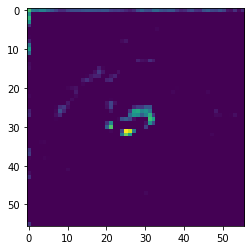

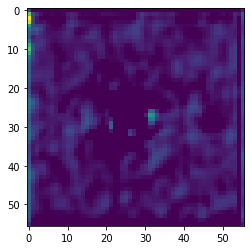

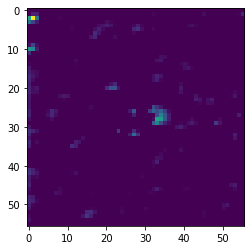

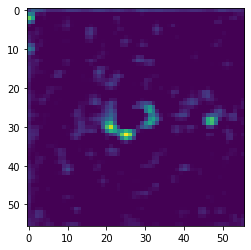

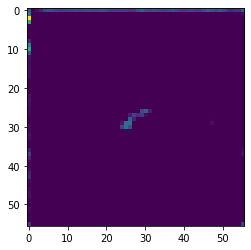

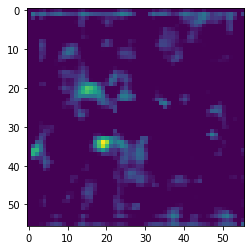

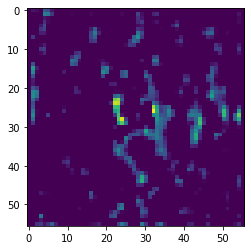

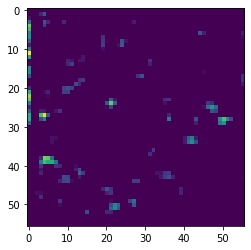

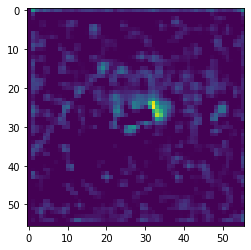

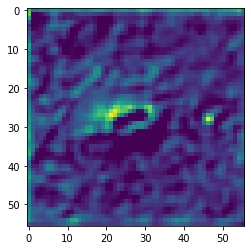

In [ ]:
# 10 primeiros filtros
for i in range(0,10):
    plt.imshow(features[0,:,:,i].astype(int))
    plt.show()

Iniciando a construção do modelo:

Instancia um modelo base com todos os pesos e remove o classificador do modelo utilizando o parâmetro `include_top=False`.

In [ ]:
import os
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

pretreined_model = VGG16(
    weights='imagenet',
    input_shape=(150, 150, 3),
    include_top=False
    )
pretreined_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

A última camada de features tem shape (4, 4, 512) sobre o qual adicionameros um classificador densamente conectado.

In [ ]:
model = Sequential()
model.add(pretreined_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


O VGG16 foi adicionado no modelo como se fosse uma camada.

Congela os pesos do modelo base para não serem treinados:

In [ ]:
pretreined_model.trainable = False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# Data Augmentation


In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    os.path.join('train'),
    target_size=(150, 150),
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    os.path.join('test'),
    target_size=(150, 150),
    class_mode='binary'
)

model.compile(loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=2,
    validation_data=validation_generator
)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Epoch 1/2
83/83 [==============================] - 671s 8s/step - loss: 0.6565 - accuracy: 0.7254 - val_loss: 0.4575 - val_accuracy: 0.7773
Epoch 2/2
83/83 [==============================] - 659s 8s/step - loss: 0.4618 - accuracy: 0.7850 - val_loss: 0.4379 - val_accuracy: 0.8136


In [ ]:
# salvando os parâmetros e a estrutura do modelo com o método save
model.save('transfer_learning_model.h5')

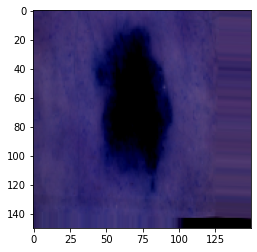

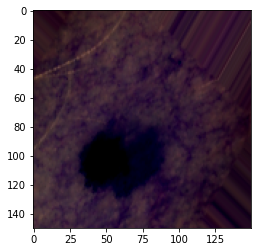

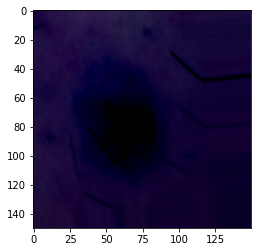

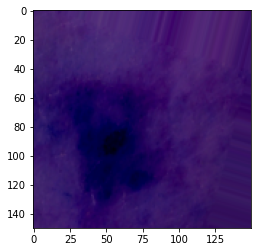

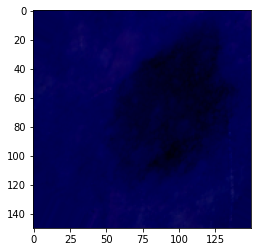

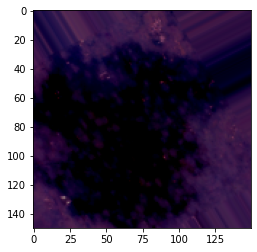

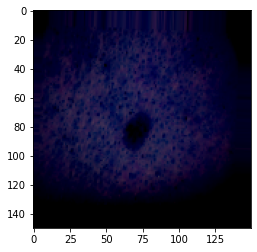

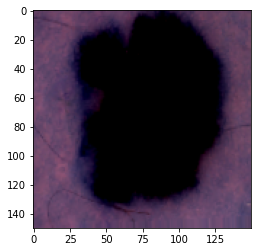

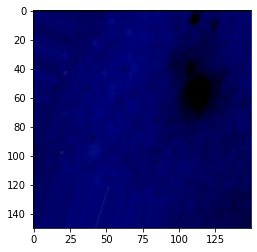

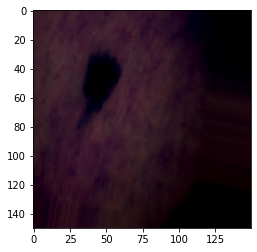

In [ ]:
# Exemplo de como as imagens ficam após o Data Augmentation
import matplotlib.pyplot as plt

x_batch, y_batch = next(train_generator)

for i in range (0,10):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

Data Exploration 

In [1]:
import os
import numpy as np
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical 

In [9]:
print(os.listdir('../content/test'))
print(os.listdir('../content/train'))

ben_train_path = '../content/train/benign'
mal_train_path = '../content/train/malignant'

ben_test_path = '../content/test/benign'
mal_test_path = '../content/test/malignant'

read = lambda image_name: np.asarray(Image.open(image_name).convert("RGB"))

['malignant', 'benign']
['malignant', 'benign']


In [10]:
def loadDataset():
    ## Load training images 
    benign_images = [read(os.path.join(ben_train_path, filename)) for filename in os.listdir(ben_train_path)]
    X_benign_train = np.array(benign_images, dtype='uint8')
    malignant_images = [read(os.path.join(mal_train_path, filename)) for filename in os.listdir(mal_train_path)]
    X_malignant_train = np.array(malignant_images, dtype='uint8')
   
    ## Load testing images
    benign_images = [read(os.path.join(ben_test_path, filename)) for filename in os.listdir(ben_test_path)]
    X_benign_test = np.array(benign_images, dtype='uint8')
    malignant_images = [read(os.path.join(mal_test_path, filename)) for filename in os.listdir(mal_test_path)]
    X_malignant_test = np.array(malignant_images, dtype='uint8')
    
    ## Generate labels
    Y_benign_train = np.zeros((X_benign_train.shape[0],1))
    Y_malignant_train = np.ones((X_malignant_train.shape[0],1))

    Y_benign_test = np.zeros((X_benign_test.shape[0],1))
    Y_malignant_test = np.ones((X_malignant_test.shape[0],1))
    
    ## Merge Data
    X_train = np.concatenate((X_benign_train, X_malignant_train), axis = 0)
    Y_train = np.concatenate((Y_benign_train, Y_malignant_train), axis = 0)

    X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
    Y_test = np.concatenate((Y_benign_test, Y_malignant_test), axis = 0)
    
    ## Shuffle data
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    X_train = X_train[arr]
    Y_train = Y_train[arr]

    arr = np.arange(X_test.shape[0])
    np.random.shuffle(arr)
    X_test = X_test[arr]
    Y_test = Y_test[arr]
    
    return X_train,X_test,Y_train,Y_test

In [11]:
X_train,X_test,Y_train,Y_test = loadDataset()

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2637, 224, 224, 3)
(2637, 1)
(660, 224, 224, 3)
(660, 1)


Data visualization

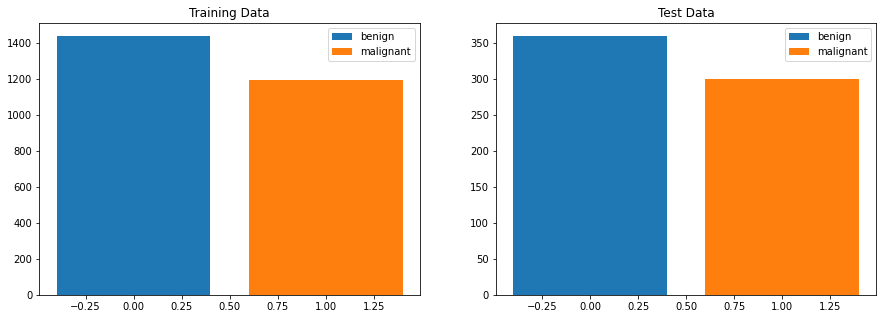

In [12]:
fig=plt.figure(figsize=(15, 5))

for i in range(1, 3): 
    ax = fig.add_subplot(1, 2, i)
    if i == 1:
        ax.title.set_text('Training Data')
        plt.bar(0, Y_train[np.where(Y_train == 0)].shape[0], label = 'benign')
        plt.bar(1, Y_train[np.where(Y_train == 1)].shape[0], label = 'malignant')
        plt.legend()
    else:
        ax.title.set_text('Test Data')
        plt.bar(0, Y_test[np.where(Y_test == 0)].shape[0], label = 'benign')
        plt.bar(1, Y_test[np.where(Y_test == 1)].shape[0], label = 'malignant')
        plt.legend()
plt.show()

The dataset is balanced. It has 1800 (1440+360) benign samples and 1497 (1197+300) malignant samples.

Data generators

In [30]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
import tensorflow
from tensorflow.keras.applications.vgg16 import VGG16
from keras.models import Sequential,Model
from tensorflow.keras.layers import Flatten,Dense,Dropout,LeakyReLU,ReLU,Conv2D, MaxPool2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from datetime import datetime
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
#ReduceLROnPlateau: Reduce learning rate when a metric " val_accuracy " has stopped improving.
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5, min_lr=1e-7)

Image Data Generator

In [32]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0,validation_split=1./3)

train_datagen_aug = ImageDataGenerator(rescale=1.0/255.0,
                                       zoom_range = 0.2,
                                       vertical_flip = True , 
                                       rotation_range=40,
                                       horizontal_flip = True)
test_datagen_aug = ImageDataGenerator(rescale=1.0/ 255.0,validation_split=1./3)

In [33]:
def dataGenerators(batch_size,train_datagen,test_datagen):
  train_data_dir='../content/train'
  test_data_dir='../content/test'

  img_height= 224
  img_width = 224
  batch_size= batch_size

  train_generator = train_datagen.flow_from_directory(
      train_data_dir,
      target_size=(img_height, img_width),
      color_mode="rgb",
      batch_size=batch_size,
      seed=42,
      class_mode='binary') 

  valid_generator = test_datagen.flow_from_directory(
      test_data_dir, # same directory as testing data
      target_size=(img_height, img_width),
      color_mode="rgb",
      batch_size=batch_size,
      class_mode='binary',
      seed=42,
      subset='validation') # set as validation data

  test_generator  = test_datagen.flow_from_directory(
          test_data_dir,  
          target_size=(img_height,img_width), 
          color_mode="rgb",
          batch_size=batch_size,  
          class_mode='binary',
          shuffle=False,
          subset='training') 
  return train_generator,valid_generator,test_generator

In [34]:
def model_train_plot_evaluate(model,train_generator,valid_generator,test_generator,epochs):
    start = datetime.now()
    
    STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
    STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
    STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
    
    model_history=model.fit(train_generator,
                      steps_per_epoch=STEP_SIZE_TRAIN,
                      validation_data=valid_generator,
                      validation_steps=STEP_SIZE_VALID,
                      epochs=epochs,
                      shuffle=False,
                      callbacks=[learning_rate_reduction])
    
    duration = datetime.now() - start
    print("Training completed in time: ", duration)
    
    print(model_history.history.keys())

    plt.plot(model_history.history['accuracy'])
    plt.plot(model_history.history['val_accuracy'])
    plt.title('Model accuracy values')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('Model loss values')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    print("Training Accuracy: " , model.evaluate(train_generator,steps=STEP_SIZE_TRAIN)[1]*100 , "%")
    print("Validation Accuracy: " , model.evaluate(valid_generator,steps=STEP_SIZE_VALID)[1]*100 , "%")
    print("Test Accuracy: " , model.evaluate(test_generator,steps=STEP_SIZE_TEST)[1]*100 , "%")
    
    
#     test_generator.reset()
#     pred=model.predict(test_generator,verbose=1)
#     pred[pred <= 0.5] = 0.
#     pred[pred > 0.5] = 1.
#     pred = pred.flatten()
#     print(classification_report(test_generator.labels, pred))

In [40]:
## Model with 2 additional layers
def vggModel_1():
    vgg_model = VGG16(input_shape = (224, 224, 3),include_top = False,weights = 'imagenet')
    for layer in vgg_model.layers:
      layer.trainable = False
    x = Flatten()(vgg_model.output)
    x = Dense(32, activation='relu')(x)
    x = Dense(16, activation='relu')(x)
    prediction = Dense(1, activation='sigmoid')(x)
    model = tensorflow.keras.models.Model(inputs=vgg_model.input, outputs=prediction)
    model.summary()
    
    adam = Adam(1e-5)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model

VGG16 

In [42]:
batchSizes = [16,32,64,128]
epochs = 3
print("----------------------------------- Without Data Augmentation ------------------------------------")
for i in batchSizes:
    print("----------------------------------- batch size = "+str(i)+" ------------------------------------")
    train_generator,valid_generator,test_generator = dataGenerators(i,train_datagen,test_datagen)
    print("----------------------------------- Model #1 ------------------------------------")
    m2 = vggModel_1()
    model_train_plot_evaluate(m2,train_generator,valid_generator,test_generator,epochs)

----------------------------------- Without Data Augmentation ------------------------------------
----------------------------------- batch size = 16 ------------------------------------
Found 2637 images belonging to 2 classes.
Found 220 images belonging to 2 classes.
Found 440 images belonging to 2 classes.
----------------------------------- Model #1 ------------------------------------
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0     

KeyboardInterrupt: ignored

In [ ]:
## CNN Model
def cnnModel_1():

    model = Sequential()

    model.add(Conv2D(64,(3,3),padding="same",activation="relu",kernel_initializer="glorot_uniform",input_shape=(224,224,3)))
    model.add(MaxPool2D((2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Conv2D(64,(3,3),padding="same",activation="relu",kernel_initializer="glorot_uniform"))
    model.add(MaxPool2D((2,2)))

    model.add(Conv2D(64,(3,3),padding="same",activation="relu",kernel_initializer="glorot_uniform"))
    model.add(MaxPool2D((2,2)))

    model.add(Flatten())

    model.add(Dense(128,activation="relu",kernel_initializer="normal"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1,activation="sigmoid"))
    model.summary()

    adam = Adam()

    model.compile(loss = "binary_crossentropy",optimizer = adam , metrics=["accuracy"])
    
    return model

In [ ]:
batchSizes = [16,32,64,128]
epochs = 3
print("----------------------------------- Without Data Augmentation ------------------------------------")
for i in batchSizes:
    print("----------------------------------- batch size = "+str(i)+" ------------------------------------")
    train_generator,valid_generator,test_generator = dataGenerators(i,train_datagen,test_datagen)
    print("----------------------------------- Model #1 ------------------------------------")
    m2 = cnnModel_1()
    model_train_plot_evaluate(m2,train_generator,valid_generator,test_generator,epochs)

In [ ]:
batchSizes = [16,32,64,128]
epochs = 3
print("----------------------------------- With Data Augmentation ------------------------------------")
for i in batchSizes:
    print("----------------------------------- batch size = "+str(i)+" ------------------------------------")
    train_generator,valid_generator,test_generator = dataGenerators(i,train_datagen_aug,test_datagen_aug)
    print("----------------------------------- Model #1 ------------------------------------")
    m2 = cnnModel_1()
    model_train_plot_evaluate(m2,train_generator,valid_generator,test_generator,epochs)